In [80]:
import tensorflow.compat.v1 as tf
config=tf.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.Session(config=config)

In [81]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [82]:
#Image Properties
Image_Width=48
Image_Height=48
Image_Channel=3
Image_Size=(Image_Width,Image_Height)

In [83]:
#Preparing dataset
#(The code in this cell is inspired from a blog by DATAFLAIR TEAM)
filenames=os.listdir("./Training")
categories=[]
for f_name in filenames:
    category=f_name[0:2]
    if category== "An":
        categories.append("Angry")
    elif category=="Fe":
        categories.append("Fear")
    elif category=="Ha":
        categories.append("Happy")
    elif category=="Ne":
        categories.append("Neutral")
    elif category=="Sa":
        categories.append("Sad")
    else:
        categories.append("Surprise")


In [84]:
df=pd.DataFrame({"filenames":filenames,"category":categories})

In [85]:
df

,filenames,category
0,Angry-1.jpg,Angry
1,Angry-10.jpg,Angry
2,Angry-100.jpg,Angry
3,Angry-1000.jpg,Angry
4,Angry-1001.jpg,Angry
...,...,...
28268,Suprise-996.jpg,Surprise
28269,Suprise-997.jpg,Surprise
28270,Suprise-998.jpg,Surprise
28271,Suprise-999.jpg,Surprise


In [86]:
df.iloc[5000:]

,filenames,category
5000,Fear-1903.jpg,Fear
5001,Fear-1904.jpg,Fear
5002,Fear-1905.jpg,Fear
5003,Fear-1906.jpg,Fear
5004,Fear-1907.jpg,Fear
...,...,...
28268,Suprise-996.jpg,Surprise
28269,Suprise-997.jpg,Surprise
28270,Suprise-998.jpg,Surprise
28271,Suprise-999.jpg,Surprise


In [87]:
df=df.sample(frac=1).reset_index(drop=True)
df

,filenames,category
0,Happy-3764.jpg,Happy
1,Neutral-603.jpg,Neutral
2,Angry-329.jpg,Angry
3,Happy-1488.jpg,Happy
4,Fear-1516.jpg,Fear
...,...,...
28268,Fear-767.jpg,Fear
28269,Angry-944.jpg,Angry
28270,Happy-5043.jpg,Happy
28271,Suprise-2008.jpg,Surprise


In [89]:
df

,filenames,category
0,Happy-3764.jpg,Happy
1,Neutral-603.jpg,Neutral
2,Angry-329.jpg,Angry
3,Happy-1488.jpg,Happy
4,Fear-1516.jpg,Fear
...,...,...
28268,Fear-767.jpg,Fear
28269,Angry-944.jpg,Angry
28270,Happy-5043.jpg,Happy
28271,Suprise-2008.jpg,Surprise


In [90]:
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [91]:
train_df

,filenames,category
0,Neutral-526.jpg,Neutral
1,Suprise-1349.jpg,Surprise
2,Fear-3702.jpg,Fear
3,Suprise-1275.jpg,Surprise
4,Sad-4476.jpg,Sad
...,...,...
22613,Happy-4153.jpg,Happy
22614,Sad-1206.jpg,Sad
22615,Sad-4153.jpg,Sad
22616,Suprise-2735.jpg,Surprise


In [92]:
validate_df

,filenames,category
0,Happy-1627.jpg,Happy
1,Fear-2674.jpg,Fear
2,Sad-1126.jpg,Sad
3,Neutral-2698.jpg,Neutral
4,Happy-479.jpg,Happy
...,...,...
5650,Fear-523.jpg,Fear
5651,Neutral-2254.jpg,Neutral
5652,Sad-817.jpg,Sad
5653,Sad-3244.jpg,Sad


In [93]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=64

In [94]:
total_train,total_validate

(22618, 5655)

In [95]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_generator=train_datagen.flow_from_dataframe(train_df,"./Training",x_col="filenames",y_col="category",target_size=Image_Size,class_mode="categorical",batch_size=batch_size)

Found 22618 validated image filenames belonging to 6 classes.


In [96]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_genertor=validation_datagen.flow_from_dataframe(validate_df,"./Training",x_col="filenames",y_col="category",target_size=Image_Size,class_mode="categorical",batch_size=batch_size)

Found 5655 validated image filenames belonging to 6 classes.


In [97]:
#Creating neural model
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
model=tf.keras.models.Sequential()
#First Layer
model.add(Conv2D(64,(5,5),input_shape=[48,48,3],activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64,(5,5),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Layer
model.add(Conv2D(128,(5,5),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128,(5,5),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Third Layer
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Final Layer
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="softmax"))


In [98]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(
    learning_rate=3e-4),metrics=["accuracy"])

In [99]:
#Call backs
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(monitor="val_accuracy",patience=2,verbose=1,factor=0.5,min_lr=0.00001)
call_backs=[earlystop,learning_rate_reduction]

In [100]:
#Training
epochs=15
face=model.fit(train_generator,epochs=epochs,validation_data=validation_genertor,validation_steps=total_validate/batch_size,steps_per_epoch=total_train/batch_size,callbacks=call_backs)

Epoch 1/15
354/353 [==============================] - 920s 3s/step - loss: 1.7492 - accuracy: 0.2928 - val_loss: 1.8605 - val_accuracy: 0.2739 - lr: 3.0000e-04
Epoch 2/15
354/353 [==============================] - 3575s 10s/step - loss: 1.5448 - accuracy: 0.3889 - val_loss: 1.5764 - val_accuracy: 0.3563 - lr: 3.0000e-04
Epoch 3/15
354/353 [==============================] - 1219s 3s/step - loss: 1.4039 - accuracy: 0.4475 - val_loss: 1.5937 - val_accuracy: 0.4366 - lr: 3.0000e-04
Epoch 4/15
354/353 [==============================] - 1409s 4s/step - loss: 1.2915 - accuracy: 0.4980 - val_loss: 1.2245 - val_accuracy: 0.5270 - lr: 3.0000e-04
Epoch 5/15
354/353 [==============================] - 1968s 6s/step - loss: 1.2068 - accuracy: 0.5327 - val_loss: 1.1465 - val_accuracy: 0.5583 - lr: 3.0000e-04
Epoch 6/15
354/353 [==============================] - 743s 2s/step - loss: 1.1568 - accuracy: 0.5548 - val_loss: 1.1502 - val_accuracy: 0.5588 - lr: 3.0000e-04
Epoch 7/15
354/353 [===============

In [116]:
#Saving the model
model.save("Facial_Recognition.h5")

In [118]:
model=keras.models.load_model("Facial_Recognition.h5")

In [121]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("Sad-306.jpg",target_size=(48,48))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
train_generator.class_indices

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Surprise': 5}

In [123]:
result

array([[7.6822206e-02, 2.7521998e-09, 9.2317778e-01, 0.0000000e+00,
        8.9900149e-35, 1.2285435e-15]], dtype=float32)

In [124]:
epochs=11
face=model.fit(train_generator,epochs=epochs,validation_data=validation_genertor,validation_steps=total_validate/batch_size,steps_per_epoch=total_train/batch_size,callbacks=call_backs)

Epoch 1/11
354/353 [==============================] - 743s 2s/step - loss: 0.8545 - accuracy: 0.6824 - val_loss: 0.9936 - val_accuracy: 0.6265 - lr: 1.5000e-04
Epoch 2/11
354/353 [==============================] - 748s 2s/step - loss: 0.8398 - accuracy: 0.6813 - val_loss: 1.0181 - val_accuracy: 0.6150 - lr: 1.5000e-04
Epoch 3/11
354/353 [==============================] - 747s 2s/step - loss: 0.8247 - accuracy: 0.6902 - val_loss: 0.9518 - val_accuracy: 0.6499 - lr: 1.5000e-04
Epoch 4/11
354/353 [==============================] - 746s 2s/step - loss: 0.8080 - accuracy: 0.6967 - val_loss: 1.0061 - val_accuracy: 0.6393 - lr: 1.5000e-04
Epoch 5/11
354/353 [==============================] - ETA: -1s - loss: 0.7989 - accuracy: 0.7006
Epoch 00005: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.
354/353 [==============================] - 795s 2s/step - loss: 0.7989 - accuracy: 0.7006 - val_loss: 0.9945 - val_accuracy: 0.6371 - lr: 1.5000e-04
Epoch 6/11
354/353 [==============

In [1]:
import keras
model=keras.models.load_model("Facial_Recognition121.h5")

In [2]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("Angry-30.jpg",target_size=(48,48))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
#train_generator.class_indices

In [3]:
result

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [4]:
maxi=result[0][0]
max_in=0
for i in result[0]:
    if i> maxi:
        maxi=i
        max_in=list(result[0]).index(i)
print(max_in)

0


In [16]:
#This function predict the facial expression and play music video according to it
def image(image_path):
    import keras
    import webbrowser
    import matplotlib.pyplot as plt
    import time
    model=keras.models.load_model("Facial_Recognition121.h5")
    import numpy as np
    from keras.preprocessing import image
    test_image=image.load_img(image_path,target_size=(48,48))
    print(plt.imshow(test_image))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    maxi=result[0][0]
    max_in=0
    websites=["https://www.youtube.com/watch?v=BN45QQ7R92M",
              "https://www.youtube.com/watch?v=AETFvQonfV8",
              "https://www.youtube.com/watch?v=W_p-PYvE1IU",
              "https://www.youtube.com/watch?v=uqa0BvYy03I",
              "https://www.youtube.com/watch?v=61g5fMnZJ4A",
              "https://www.youtube.com/results?search_query=suprise+hindi+songs"]
    feelings=["you look angry,you might like this song","you seems afraid of something,let us listen to hanuman chalisa",
              "I think you are happy, so let us celebrate","What a good day,let us listen to a good old melody",
             "You look sad,Do no worry i  have got something for you","What a suprise.It is this for some song.Here pick one"]
    for i in result[0]:
        if i> maxi:
            maxi=i
            max_in=list(result[0]).index(i)
    print(feelings[max_in])
    time.sleep(2.5)
    webbrowser.open(websites[max_in])

Please Enter Your Photo
IMG_20200813_123724.jpg
AxesImage(54,36;334.8x217.44)
you look angry,you might like this song


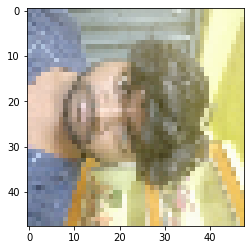

In [19]:
print("Please Enter Your Photo")
str=input()
image(str)

Please Enter Your Photo
happy.jpg
AxesImage(54,36;334.8x217.44)
I think you are happy, so let us celebrate


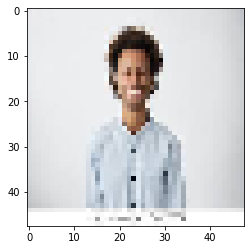

In [24]:
print("Please Enter Your Photo")
str=input()
image(str)

Please Enter Your Photo
surprisejpg.jpg
AxesImage(54,36;334.8x217.44)
you look angry,you might like this song


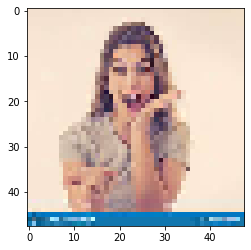

In [26]:
print("Please Enter Your Photo")
str=input()
image(str)

In this note book I have not used the concept of transfer learning.Accuracy of the model can further be improve by using models like mtcnn or vgg-16.